<h1 style="text-align : center"> Predict CO2 Emmision based on engine size of cars : simple linear regression </h1>

<p> in this notebook we will build a simple linear regression model to predict the co2 emmissions based on the engine size of cars  </p>

## Import libraries
<b> numpy </b> : to manupilate vectors and matrix <br>
<b> pandas </b>  : for importing and manupilating the data <br>
<b> matplotlib </b> : to visualize the data <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lets start by importing the data

In [3]:
df = pd.read_csv('datasets/8-1FuelConsumptionCo2.csv')

after importing the data lets see the first five rows to see the information that contains.
it contains 13 column, each column contains a spesific information about the car like model the year when it released the engin size..., we will focus on 2 colums the engin size and co2emissins, and based on them we will build our model to see how the engine size affect the co2 emission

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape # the dataset contain 1067 cars

(1067, 13)

In [7]:
simpleData=df[['ENGINESIZE','CO2EMISSIONS']] # we will take the column we spicifed

### visualizing

lets visualize how the engine size influente the co2 emission. <br>
here we see that both the engine size ande co2 emission augmente in linear way so the more the engine size is bigger the co2 emission got bigger too

Text(0, 0.5, 'CO2EMISSIONS')

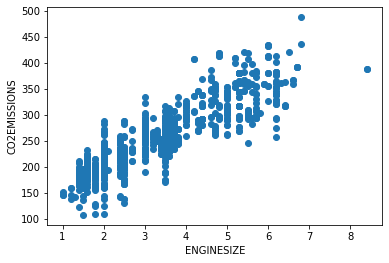

In [8]:
plt.scatter(simpleData['ENGINESIZE'],simpleData['CO2EMISSIONS'])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

the same thing to fuel consumption

Text(0, 0.5, 'CO2EMISSIONS')

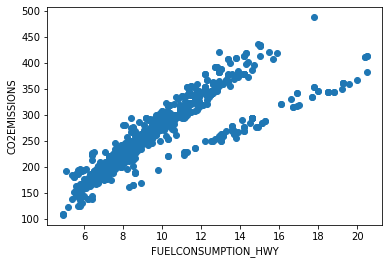

In [9]:
plt.scatter(df['FUELCONSUMPTION_HWY'],simpleData['CO2EMISSIONS'])
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')

### spliting the dataset

we will split the data set to training part and testing part

In [11]:
x=simpleData['ENGINESIZE'] # data 
y=simpleData['CO2EMISSIONS'] # label

In [12]:
x_train=np.array(x[0:900])
y_train=np.array(y[0:900])
x_test=np.array(x[901:])
y_test=np.array(y[901:])

In [13]:
x.size , y.size

(1067, 1067)

### implementation of gradiant decsent : linear regression

In [14]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [15]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
        
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [16]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function ): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
       
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [17]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 550
tmp_alpha = 0.11
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: ( 39.0274,125.9542)


In [18]:
#linear function to calculate the predictions
def simpleLinear(x,w,b) :
    return x*w+b;

In [19]:
result=simpleLinear(x_test,w_final,b_final)

In [35]:
result[0:20],y_test[0:20]

(array([266.06587588, 266.06587588, 242.39932877, 242.39932877,
        313.39897009, 242.39932877, 313.39897009, 313.39897009,
        348.89879075, 348.89879075, 348.89879075, 348.89879075,
        242.39932877, 266.06587588, 266.06587588, 242.39932877,
        266.06587588, 266.06587588, 266.06587588, 266.06587588]),
 array([251, 255, 260, 264, 292, 260, 294, 297, 340, 313, 354, 324, 286,
        290, 285, 275, 274, 269, 260, 262], dtype=int64))

lets plot the model and the data

Text(0, 0.5, 'CO2EMISSIONS')

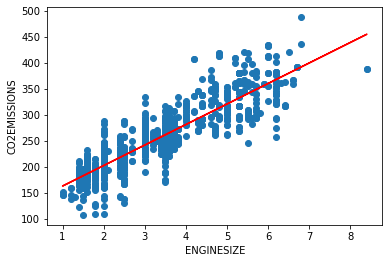

In [33]:
plt.scatter(simpleData['ENGINESIZE'],simpleData['CO2EMISSIONS'])
plt.plot(x_test,result,'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

### implementing the model with sickit-learn

In [22]:
from sklearn.linear_model import SGDRegressor,Lasso,Ridge,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
sgdr=SGDRegressor(max_iter=400)
sgdr.fit(x_train.reshape(-1,1),y_train)

SGDRegressor(max_iter=400)

In [24]:
result=sgdr.predict(x_test.reshape(-1,1))

#### the accuracy

In [26]:
print(f'simple linear regression accuracy{r2_score(y_test,result):8.4f}')

simple linear regression accuracy  0.7950


In [27]:
b=sgdr.intercept_
w=sgdr.coef_

In [28]:
def linearfct(w,b,x) :
    return w*x+b;

In [29]:
y_result=linearfct(w,b,x_train)

lets plot the model and see how well the model fit the data

Text(0, 0.5, 'CO2EMISSIONS')

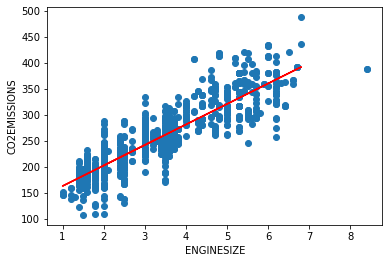

In [31]:
plt.scatter(simpleData['ENGINESIZE'],simpleData['CO2EMISSIONS'])
plt.plot(x_train,y_result,'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

## lasso 

In [39]:
lasso = Lasso(alpha=0.00001)
lasso.fit(x_train.reshape(-1,1), y_train)

Lasso(alpha=1e-05)

In [40]:
result2=lasso.predict(x_test.reshape(-1,1))

In [41]:
print(f'lasso accuracy{r2_score(y_test,result2):8.4f}')

lasso accuracy  0.7944


### visualizing the model


Text(0, 0.5, 'CO2EMISSIONS')

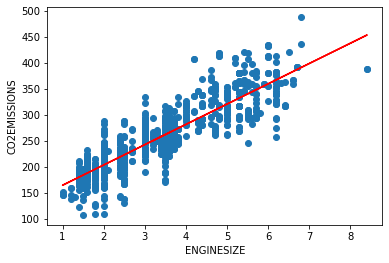

In [43]:
plt.scatter(simpleData['ENGINESIZE'],simpleData['CO2EMISSIONS'])
plt.plot(x_test,result2,'red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

## linear Regressor

In [41]:
lr=LinearRegression()
lr.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [44]:
result3=lr.predict(x_test.reshape(-1,1))

### accuracy

In [45]:
print(f'linear accuracy{r2_score(y_test,result3):8.4f}')

linear accuracy  0.7944


In [47]:
y_result3=lr.predict(x_train.reshape(-1,1))

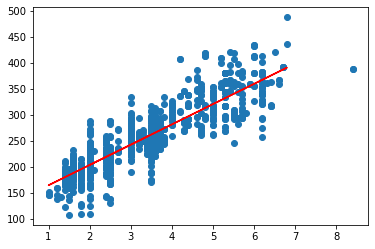

In [48]:
plt.scatter(simpleData['ENGINESIZE'],simpleData['CO2EMISSIONS'])
plt.plot(x_train,y_result3,'red')